In [106]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
import bokeh.plotting as bpl

In [107]:
bpl.output_notebook()

Loading BokehJS ...

In [108]:
def entrenador(arreglo,alcances):
    """Entrena el modelo utilizando un arreglo de publicaciones o un dataframe y sus alcances.
    
    Parameters:
        arreglo (arreglo de numpy, también puede ser un dataframe):
            Arreglo multidimensional con los valores de las métricas para cada publicación.
            Cada publicación está en una fila del arreglo.
            El orden de las métricas debe ser el siguiente [likes,love,angry,wow,haha,sad,shares].
        alcances (arreglo de numpy, tambien puede ser una serie):
            Arreglo unidimensional con los valores de los alcances para cada publicación.
            Cada publicación está en una fila del arreglo.
        
    Returns:
        red (red neuronal de Sklearn):
            Modelo de red neuronal entrenada para predecir los alcances de publicaciones.
            
    """
    logtrain = np.log1p(arreglo)
    logpredi = np.log1p(alcances)
    
    red = MLPRegressor(alpha=0.01, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', learning_rate = 'adaptive',solver= 'lbfgs')
    
    red.fit(logtrain,logpredi)
    
    return red

In [109]:
def predictor(arreglo,modelo):
    """Predice los alcances para un arreglo de publicaciones o un dataframe.
    
    Parameters:
        arreglo (arreglo de numpy, también puede ser un dataframe):
            Arreglo multidimensional con los valores de las métricas para cada publicación.
            Cada publicación está en una fila del arreglo.
            El orden de las métricas debe ser el siguiente [likes,love,angry,wow,haha,sad,shares].
            
        modelo (modelo de sklearn):
            El modelo de predicción entrenado previamente
            
    Returns:
        alcances (arreglo de numpy):
            Arreglo con los alcances para cada publicación.
            
    """
    logdata = np.log1p(arreglo)
    predata = modelo.predict(logdata)
    bacdata = np.expm1(predata)
    
    return bacdata

In [110]:
data = pd.read_csv("../data/originales/posts.csv")

In [111]:
metricas = ['likes', 'love', 'angry', 'wow', 'haha', 'sad', 'shares']

In [112]:
data["reacciones"] = data[metricas].sum(1)

In [113]:
fdata=data[(data["scope"]!=0)&(data["reacciones"]>10)&(data["reacciones"]<=data["scope"])]

In [114]:
mdata = fdata[metricas + ["scope"]]

In [115]:
mdata[:3]

,likes,love,angry,wow,haha,sad,shares,scope
0,18,7,0,0,0,0,4,3660
1,526,117,189,15,51,8,107,77468
2,28,1,0,0,0,0,13,4399


In [116]:
arr_metricas = mdata[metricas].values

In [117]:
arr_metricas

array([[ 18,   7,   0, ...,   0,   0,   4],
       [526, 117, 189, ...,  51,   8, 107],
       [ 28,   1,   0, ...,   0,   0,  13],
       ...,
       [ 23,   0,   1, ...,   0,   3,   1],
       [ 13,   0,   4, ...,   0,   0,   0],
       [ 24,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [118]:
arr_alcances = mdata["scope"].values

In [119]:
red = entrenador(arr_metricas,arr_alcances)

In [120]:
datap = pd.read_csv("../data/originales/PostsViralidadSinSaltos.tsv",sep='\t')
datat = pd.read_csv("../data/originales/TemasViralidadSinSaltos.tsv",sep='\t')

D:\Apps\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [151]:
datap["estado"].value_counts()

Ciudad de México       6515
Tamaulipas             1721
Quintana Roo           1458
Sinaloa                1342
Baja California Sur     183
Baja California          79
Sonora                   46
Name: estado, dtype: int64

In [154]:
datat["estado_T"].value_counts()

Ciudad de México       7726
Tamaulipas             1995
Sinaloa                1437
Quintana Roo           1094
Baja California Sur     341
Baja California          44
Sonora                   27
Name: estado_T, dtype: int64

In [121]:
len(datap)

79347

In [122]:
len(datat)

15044

In [123]:
datap[:3]

,id,idTema,titulo,copy,imagen,url,fbid,fechaPub,fechaCaptura,fechaMod,...,secretarias,likes,love,angry,sad,haha,wow,shares,idAnalitycs,estatus
0,25126,0,NaN,Un juez dicata prisión preventiva al agresor d...,http://monitoringpol5c3f9f24c983d.s3.amazonaws...,https://www.facebook.com/SinEmbargoMX/posts/27...,ZmVlZGJhY2s6Mjc3NzUxMzM3NTYxNDU2OQ%3D%3D&av=10...,2029-08-22,2019-08-22 23:04:34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6364.0,ACTIVO
1,79594,0,NaN,Reportan afluencia en tianguis de San Andrés T...,http://monitoringpol5c3f9f24c983d.s3.amazonaws...,https://www.facebook.com/1492009264458182/post...,ZmVlZGJhY2s6MjYyMzk2MzU2NDU5NjA3NA%3D%3D&av=10...,2023-04-17,2020-04-17 12:21:17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14421.0,ACTIVO
2,56880,9846,NaN,Conductor de Metrobús es detenido por inhalar ...,http://monitoringpol5c3f9f24c983d.s3.amazonaws...,https://www.facebook.com/Noticiasiztacalcoo/po...,ZmVlZGJhY2s6MTU0NTgyNzc5NTU1NzU0Mg%3D%3D,2020-12-26,2020-01-07,NaN,...,NaN,197.0,2.0,221.0,4.0,34.0,239.0,377.0,NaN,ACTIVO


In [124]:
datat.columns

Index(['id', 'nombre', 'estado', 'municipio', 'categorias', 'secretarias',
       'Linea', 'Estacion', 'score', 'scoreManual', 'Destacado', 'estatus',
       'imagen', 'url', 'fechaCreacion', 'fechaInsercion', 'fechaMod',
       'idAnalitycs'],
      dtype='object')

In [125]:
datap["estatus"].value_counts()

ACTIVO      79334
INACTIVO       13
Name: estatus, dtype: int64

In [126]:
datat.columns=[cadena + "_T" for cadena in datat.columns]

In [127]:
datat.rename(columns={"id_T":"idTema"},inplace=True)

In [128]:
datamix = pd.merge(datap,datat,how="left",on="idTema")

In [129]:
datamix[datamix["scoreManual_T"]==1.0][metricas].describe()

,likes,love,angry,wow,haha,sad,shares
count,165.000000,165.000000,165.000000,165.000000,165.00000,165.000000,165.000000
mean,146.248485,5.042424,16.503030,103.084848,20.09697,8.593939,140.357576
std,223.235094,19.418168,33.535679,205.731011,49.47520,26.890223,279.688153
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,0.000000,1.000000,8.000000,0.00000,0.000000,10.000000
50%,64.000000,0.000000,5.000000,30.000000,3.00000,2.000000,35.000000
75%,147.000000,2.000000,14.000000,102.000000,16.00000,6.000000,116.000000
max,1400.000000,184.000000,275.000000,1900.000000,436.00000,298.000000,1980.000000


In [130]:
datamix[metricas].describe()

,likes,love,angry,wow,haha,sad,shares
count,75157.000000,75157.000000,75157.000000,75157.000000,75157.000000,75157.000000,75157.000000
mean,179.550501,29.426148,89.356480,42.262544,60.926767,31.053422,263.305068
std,658.469935,262.490321,596.562963,222.936914,365.701705,280.443578,3264.979503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,37.000000,1.000000,2.000000,5.000000,2.000000,1.000000,18.000000
75%,125.000000,5.000000,22.000000,21.000000,16.000000,5.000000,83.000000
max,45000.000000,30000.000000,61000.000000,17000.000000,22000.000000,40000.000000,702483.000000


In [131]:
data[metricas].describe()

,likes,love,angry,wow,haha,sad,shares
count,25061.000000,25061.000000,25061.000000,25061.000000,25061.000000,25061.000000,25061.000000
mean,75.689398,7.535853,1.951798,1.887834,3.005866,0.655082,57.193648
std,511.499571,68.242673,51.128332,57.809444,99.856113,15.145557,2389.211299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,54.000000,2.000000,0.000000,0.000000,0.000000,0.000000,13.000000
max,45952.000000,4694.000000,6496.000000,8623.000000,14418.000000,1244.000000,342306.000000


In [132]:
datafp = datamix[metricas].fillna(0)

In [133]:
datapv = datafp.values

In [134]:
predicciones = predictor(datapv,red)

In [135]:
predicciones

array([4.17989530e+01, 4.17989530e+01, 6.42061308e+04, ...,
       4.17989530e+01, 4.17989530e+01, 4.17989530e+01])

In [136]:
prediccion = pd.DataFrame(predicciones,columns=["Alcance_estimado"],index=datafp.index)

In [137]:
datamix["Alcance_estimado"] = prediccion

In [138]:
datamix["reacciones"] = datamix[metricas].sum(1)

In [139]:
(datamix["Alcance_estimado"] - datamix["reacciones"]).sort_values()

40148   -1.582873e+03
7180    -4.256141e+02
25136    3.741624e+01
28321    3.741624e+01
62736    3.741624e+01
             ...     
39856    4.142154e+06
10074    4.311179e+06
18137    4.346998e+06
4029     5.165364e+06
14344    8.929414e+06
Length: 79347, dtype: float64

In [140]:
(datamix["reacciones"]/datamix["Alcance_estimado"]*100).sort_values()

0          0.000000
31563      0.000000
31568      0.000000
31573      0.000000
31575      0.000000
            ...    
78737     55.275597
17911     55.741756
77527     71.687994
40148    107.062889
7180     169.162138
Length: 79347, dtype: float64

In [141]:
datamix["score_T"]

0         NaN
1         NaN
2        22.9
3        10.2
4        74.9
         ... 
79342    51.8
79343     NaN
79344     NaN
79345     NaN
79346    29.2
Name: score_T, Length: 79347, dtype: float64

In [142]:
data_plot=datamix[datamix["score_T"].notna()][["score_T","Alcance_estimado"]]

In [143]:
len(data_plot)

76984

In [144]:
data_plot[:3]

,score_T,Alcance_estimado
2,22.9,64206.130837
3,10.2,41.798953
4,74.9,76055.805982


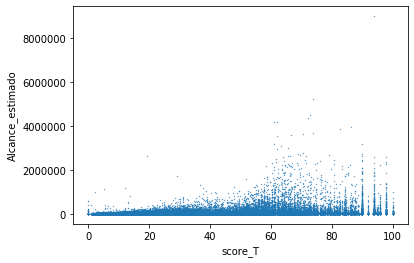

In [145]:
data_plot.plot.scatter(x="score_T",y="Alcance_estimado",s=0.1)

In [146]:
data_plot["l_score"] = data_plot["score_T"].apply(np.log10)
data_plot["l_alcan"] = data_plot["Alcance_estimado"].apply(np.log10)

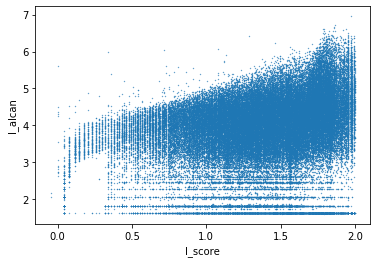

In [147]:
data_plot.plot.scatter(x="l_score",y="l_alcan",s=0.1)

In [148]:
datamix.columns

Index(['id', 'idTema', 'titulo', 'copy', 'imagen', 'url', 'fbid', 'fechaPub',
       'fechaCaptura', 'fechaMod', 'estado', 'municipio', 'categorias',
       'secretarias', 'likes', 'love', 'angry', 'sad', 'haha', 'wow', 'shares',
       'idAnalitycs', 'estatus', 'nombre_T', 'estado_T', 'municipio_T',
       'categorias_T', 'secretarias_T', 'Linea_T', 'Estacion_T', 'score_T',
       'scoreManual_T', 'Destacado_T', 'estatus_T', 'imagen_T', 'url_T',
       'fechaCreacion_T', 'fechaInsercion_T', 'fechaMod_T', 'idAnalitycs_T',
       'Alcance_estimado', 'reacciones'],
      dtype='object')

In [44]:
datamix["estado_T"].value_counts().index

Index(['Ciudad de México', 'Tamaulipas', 'Sinaloa', 'Quintana Roo',
       'Baja California Sur', 'Baja California', 'Sonora'],
      dtype='object')

In [45]:
datamix["estado"].value_counts()

Ciudad de México       6515
Tamaulipas             1721
Quintana Roo           1458
Sinaloa                1342
Baja California Sur     183
Baja California          79
Sonora                   46
Name: estado, dtype: int64

In [46]:
datamix["estado"].isna().value_counts()

True     68003
False    11344
Name: estado, dtype: int64

In [47]:
pubtemedo = datamix.groupby(["estado_T","idTema"]).size().to_frame("Publicaciones").sort_values("Publicaciones",ascending=False).reset_index()

In [48]:
pubtemedo

,estado_T,idTema,Publicaciones
0,Baja California,59,415
1,Ciudad de México,2693,172
2,Ciudad de México,827,134
3,Ciudad de México,12023,115
4,Ciudad de México,8705,94
...,...,...,...
12378,Sinaloa,6936,1
12379,Sinaloa,6938,1
12380,Sinaloa,6943,1
12381,Ciudad de México,12396,1


In [49]:
pubinfo = pubtemedo.groupby("estado_T")["Publicaciones"].describe()
pubinfo["Pub_totales"] = datamix.groupby(["estado_T"]).size().to_frame("Publicaciones")
pubinfo.sort_values("Pub_totales",ascending=False)

,count,mean,std,min,25%,50%,75%,max,Pub_totales
estado_T,,,,,,,,,
Ciudad de México,7549.0,5.225593,7.563692,1.0,1.0,3.0,6.0,172.0,39448
Tamaulipas,1964.0,6.579939,6.004772,1.0,3.0,5.0,8.0,89.0,12923
Sinaloa,1411.0,4.550673,3.574449,1.0,2.0,4.0,6.0,38.0,6421
Quintana Roo,1059.0,4.407932,3.035669,1.0,2.0,4.0,6.0,30.0,4668
Baja California Sur,336.0,5.410714,5.553356,1.0,2.0,4.0,6.0,50.0,1818
Baja California,39.0,15.076923,65.846466,1.0,2.0,3.0,6.5,415.0,588
Sonora,25.0,7.760000,10.963120,1.0,1.0,3.0,10.0,42.0,194


In [50]:
estado = ["Ciudad de México"]
alcmax = 8500000
pubmax = 200
cadmod = "CDMX_8p5M_pm200"
#estado = ["Ciudad de México","Quintana Roo","Sinaloa","Tamaulipas"]
data_plot=datamix[(datamix["estado_T"].isin(estado))][metricas+["score_T","Alcance_estimado","reacciones","idTema","nombre_T"]]
data_plot["Alcance_est_top"] = data_plot["Alcance_estimado"].apply(lambda x: min(x,alcmax))

In [51]:
len(data_plot)

39448

In [52]:
data_plot[:3]

,likes,love,angry,wow,haha,sad,shares,score_T,Alcance_estimado,reacciones,idTema,nombre_T,Alcance_est_top
2,197.0,2.0,221.0,239.0,34.0,4.0,377.0,22.9,98789.273091,1074.0,9846,Conductor de Metrobús es detenido por inhalar ...,98789.273091
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2,253.032022,0.0,10224,CS pidió investigar la compra de bicicletas el...,253.032022
4,205.0,0.0,808.0,35.0,22.0,6.0,782.0,74.9,167374.921135,1858.0,10653,Sujetos amenazan a hombre tras ser increpados ...,167374.921135


In [53]:
data_plot["reac_alcan"] = data_plot["reacciones"].div(data_plot["Alcance_estimado"])*100
data_plot["share_alcan"] = data_plot["shares"].div(data_plot["Alcance_estimado"])*100
data_plot["reac_alcan_top"] = data_plot["reacciones"].div(data_plot["Alcance_est_top"])*100
data_plot["share_alcan_top"] = data_plot["shares"].div(data_plot["Alcance_est_top"])*100
data_plot["l_score"] = data_plot["score_T"].apply(np.log10)
data_plot["l_alcan"] = data_plot["Alcance_estimado"].apply(np.log10)
data_plot["l_alcan_top"] = data_plot["Alcance_est_top"].apply(np.log10)
data_plot["l_reacc"] = data_plot["reacciones"].apply(np.log10)
data_plot["l_share"] = data_plot["shares"].apply(np.log10)
data_plot["l_reac_alcan"] = data_plot["reac_alcan"].apply(np.log10)
data_plot["l_share_alcan"] = data_plot["share_alcan"].apply(np.log10)
data_plot["l_reac_alcan_top"] = data_plot["reac_alcan"].apply(np.log10)
data_plot["l_share_alcan_top"] = data_plot["share_alcan"].apply(np.log10)

In [54]:
data_plot[["reacciones","shares","Alcance_estimado","Alcance_est_top","reac_alcan","share_alcan","score_T"]].describe()

,reacciones,shares,Alcance_estimado,Alcance_est_top,reac_alcan,share_alcan,score_T
count,39448.000000,37177.000000,3.944800e+04,3.944800e+04,39448.000000,37177.000000,39101.000000
mean,823.117801,358.358716,6.282607e+04,6.282269e+04,0.938663,0.272723,31.931616
std,5347.679757,4526.120880,2.385110e+05,2.383904e+05,3.939408,4.030789,25.665732
min,0.000000,0.000000,1.327562e+02,1.327562e+02,0.000000,0.000000,0.000000
25%,24.000000,5.000000,3.606449e+03,3.606449e+03,0.568401,0.074067,10.700000
50%,106.000000,22.000000,1.423372e+04,1.423372e+04,0.812145,0.156525,24.000000
75%,412.250000,102.000000,3.817789e+04,3.817789e+04,1.138465,0.289423,50.700000
max,718236.000000,702483.000000,8.633347e+06,8.500000e+06,748.173097,748.173097,98.000000


In [55]:
data_plot_f = data_plot[(data_plot["reacciones"]>0)]

In [56]:
histdata = np.histogram(np.log10(data_plot_f["reacciones"]),bins=100)
colw = (histdata[1][1]-histdata[1][0])*0.9

In [57]:
p = bpl.figure(plot_width=1000,plot_height=400,title="Histograma de reacciones, CDMX",toolbar_location=None)
p.vbar(x=histdata[1][:-1],bottom=0,top=histdata[0],width=colw)

GlyphRenderer(id='1038', ...)

In [58]:
p.yaxis.axis_label = "Publicaciones"
p.xaxis.axis_label = "Log10 del número de reacciones"

In [59]:
bpl.show(p)

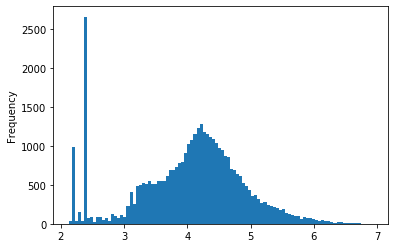

In [60]:
data_plot["l_alcan"].plot.hist(bins=100)

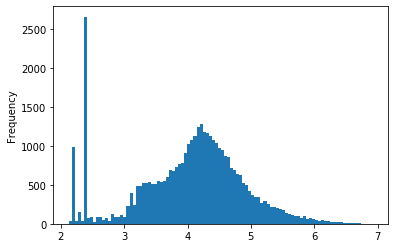

In [61]:
data_plot["l_alcan_top"].plot.hist(bins=100)

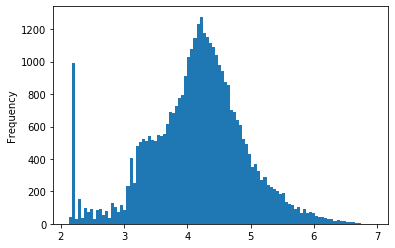

In [62]:
data_plot_f["l_alcan"].plot.hist(bins=100)

In [63]:
histdata = np.histogram(data_plot["l_alcan"],bins=100)
colw = (histdata[1][1]-histdata[1][0])*0.9

In [64]:
p = bpl.figure(plot_width=1000,plot_height=400,title="Histograma de alcance estimado, CDMX",toolbar_location=None)
p.vbar(x=histdata[1][:-1],bottom=0,top=histdata[0],width=colw)

GlyphRenderer(id='1134', ...)

In [65]:
p.yaxis.axis_label = "Publicaciones"
p.xaxis.axis_label = "Log10 del alcance estimado"

In [66]:
bpl.show(p)

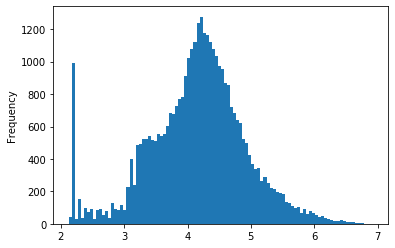

In [67]:
data_plot_f["l_alcan_top"].plot.hist(bins=100)

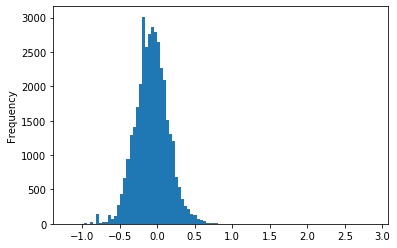

In [68]:
data_plot_f["l_reac_alcan"].plot.hist(bins=100)

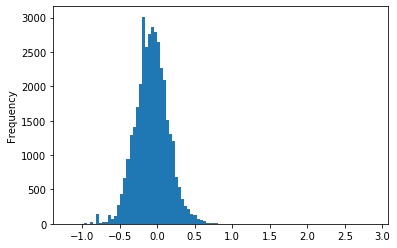

In [69]:
data_plot_f["l_reac_alcan_top"].plot.hist(bins=100)

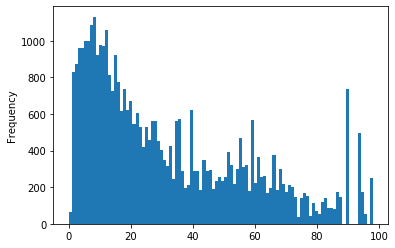

In [70]:
data_plot["score_T"].plot.hist(bins=100)

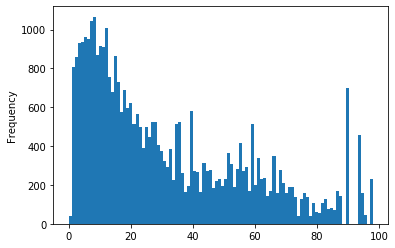

In [71]:
data_plot_f["score_T"].plot.hist(bins=100)

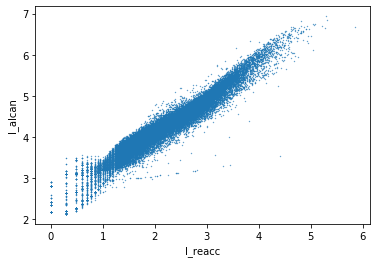

In [72]:
data_plot.plot.scatter(x="l_reacc",y="l_alcan",s=0.1)

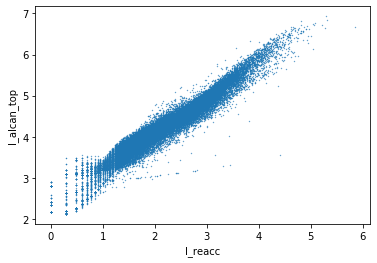

In [73]:
data_plot.plot.scatter(x="l_reacc",y="l_alcan_top",s=0.1)

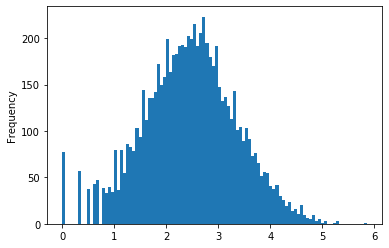

In [74]:
data_plot_f.groupby(["idTema","nombre_T"])["l_reacc"].max().plot.hist(bins=100)

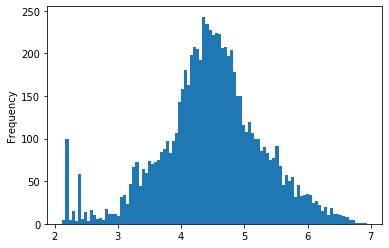

In [75]:
data_plot.groupby(["idTema","nombre_T"])["l_alcan"].max().plot.hist(bins=100)

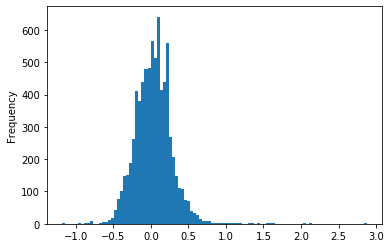

In [76]:
data_plot_f.groupby(["idTema","nombre_T"])["l_reac_alcan"].max().plot.hist(bins=100)

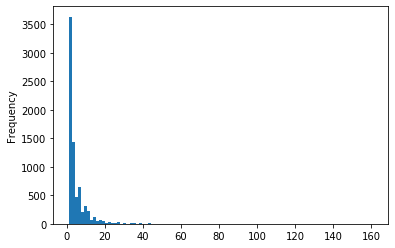

In [77]:
data_plot_f.groupby(["idTema","nombre_T"])["score_T"].size().plot.hist(bins=100)

In [78]:
histdata = np.histogram(np.log10(data_plot.groupby(["idTema","nombre_T"])["score_T"].size()),bins=100)
colw = (histdata[1][1]-histdata[1][0])*0.9

In [79]:
p = bpl.figure(plot_width=1000,plot_height=400,title="Histograma de publicaciones por tema, CDMX",toolbar_location=None)
p.vbar(x=histdata[1][:-1],bottom=0,top=histdata[0],width=colw)

GlyphRenderer(id='1238', ...)

In [80]:
p.yaxis.axis_label = "Temas"
p.xaxis.axis_label = "Log10 del número de publicaciones por tema"

In [81]:
bpl.show(p)

In [82]:
temas = data_plot.groupby("idTema").size().sort_values(ascending=False).index

In [83]:
tema = temas[0]
temdata = data_plot[data_plot["idTema"]==tema]
temdata_f = data_plot_f[data_plot_f["idTema"]==tema]

In [84]:
stema = temdata_f.sort_values("Alcance_estimado",ascending=False)

In [85]:
stema.index

Int64Index([63519, 63529, 62762, 63531, 63597, 63343, 62812, 63231, 62777,
            63285,
            ...
            63526, 63513, 63505, 63191, 62804, 63183, 62998, 63556, 63568,
            62805],
           dtype='int64', length=161)

In [86]:
stema["Alcance_estimado"].max()

412458.69613652944

In [87]:
def alcance_extra(serie,atope):
    nserie = serie.apply(lambda x: min(x,atope))
    serie_s = nserie.sort_values(ascending=False)
    index = serie_s.index
    a_max  = min(atope,serie_s.max())
    r = (atope - a_max)/atope
    rango = pd.Series(pd.RangeIndex(0,len(serie_s)),index=index)
    mults = np.power(r,rango)
    return (serie_s*mults).sum()-a_max

In [88]:
alcance_extra(pd.Series([10,5]),5)

0.0

In [89]:
grupos = data_plot.groupby(["idTema","nombre_T"])

In [90]:
alcmaxb = alcmax
por_tema = grupos.apply(lambda x: alcance_extra(x["Alcance_est_top"],alcmaxb)).to_frame("Alcance_extra")

In [91]:
por_tema["Alcance_maximo"] = grupos["Alcance_estimado"].max()
por_tema["Alcance_max_top"] = grupos["Alcance_est_top"].max()
por_tema["Alcance_suma"] = por_tema["Alcance_max_top"] + por_tema["Alcance_extra"]
por_tema["Alcance_promedio"] = grupos["Alcance_estimado"].mean()
por_tema["Alcance_prom_top"] = grupos["Alcance_est_top"].mean()
por_tema["Publicaciones"] = grupos["Alcance_estimado"].size()

In [92]:
por_tema.sort_values(["Publicaciones","Alcance_suma"],ascending=False)

,,Alcance_extra,Alcance_maximo,Alcance_max_top,Alcance_suma,Alcance_promedio,Alcance_prom_top,Publicaciones
idTema,nombre_T,,,,,,,
2693,"Balacera Artz Pedregal, mueren 2 criminales israelíes, detienen a 1 mujer y cómplices escapan",2.639382e+06,4.124587e+05,4.124587e+05,3.051841e+06,42455.953247,42455.953247,172
827,Localizan el cuerpo de Norberto Ronquillo en Xochimilco,2.913194e+06,3.328631e+06,3.328631e+06,6.241825e+06,221040.505772,221040.505772,134
12023,CS anuncia detención de presuntos feminicidas de la niña Fátima en Edomex,1.551265e+06,5.153809e+06,5.153809e+06,6.705075e+06,243614.963995,243614.963995,115
8705,"Marcha ""Ni una menos"" y vandalismo por día Internacional contra la violencia de género",2.196659e+06,4.749171e+06,4.749171e+06,6.945830e+06,263479.238026,263479.238026,94
12934,Choque de dos trenes en Metro Tacubaya deja como saldo 1 muerto y 41 heridos,2.901323e+06,2.588044e+06,2.588044e+06,5.489367e+06,196780.360864,196780.360864,93
...,...,...,...,...,...,...,...,...
15034,"Sujeto asalta tienda ubicada en Lomas Hidalgo, Tlalpan",0.000000e+00,1.489227e+02,1.489227e+02,1.489227e+02,148.922718,148.922718,1
1893,"Cuentahabiente herido tras asalto en Barranca del Muerto, ÁO",0.000000e+00,1.327562e+02,1.327562e+02,1.327562e+02,132.756186,132.756186,1
10563,Propietarios de negocios en la BJ denuncian extorsiones de grupo sindical llamada Plácido Mendoza,0.000000e+00,1.327562e+02,1.327562e+02,1.327562e+02,132.756186,132.756186,1


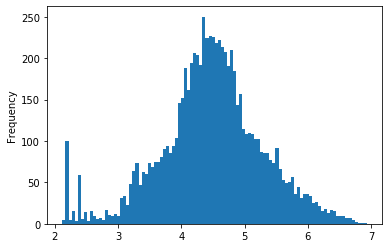

In [93]:
np.log10(por_tema["Alcance_max_top"]).plot.hist(bins=100)

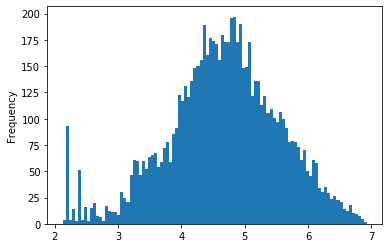

In [94]:
np.log10(por_tema["Alcance_suma"]).plot.hist(bins=100)

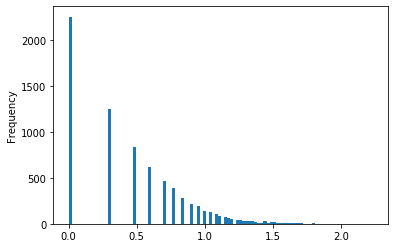

In [95]:
np.log10(por_tema["Publicaciones"]).plot.hist(bins=100)

In [96]:
def scale(inp_domain,out_range,valor):
    valor_estimado = ((out_range[1]-out_range[0])*(valor-inp_domain[0])/(inp_domain[1]-inp_domain[0])) + out_range[0]
    return np.clip(valor_estimado,out_range[0],out_range[1])

In [97]:
por_tema["Cal_alcance"] = scale((0,np.log10(alcmax)),(0,50),np.log10(por_tema["Alcance_suma"]))
por_tema["Cal_publicaciones"] = scale((0,np.log10(pubmax)),(0,50),np.log10(por_tema["Publicaciones"]))
por_tema["Calificacion"] = por_tema["Cal_alcance"] + por_tema["Cal_publicaciones"]

In [98]:
salida = por_tema[["Alcance_max_top","Alcance_extra","Alcance_suma","Publicaciones","Cal_alcance","Cal_publicaciones","Calificacion"]]
salida.sort_values(["Calificacion","Alcance_suma"],ascending=False).to_csv("../data/procesados/vir_" + cadmod + "_50_50.csv")
salida.sort_values(["Calificacion","Alcance_suma"],ascending=False)

,,Alcance_max_top,Alcance_extra,Alcance_suma,Publicaciones,Cal_alcance,Cal_publicaciones,Calificacion
idTema,nombre_T,,,,,,,
2693,"Balacera Artz Pedregal, mueren 2 criminales israelíes, detienen a 1 mujer y cómplices escapan",4.124587e+05,2.639382e+06,3.051841e+06,172,46.790084,48.576691,95.366775
827,Localizan el cuerpo de Norberto Ronquillo en Xochimilco,3.328631e+06,2.913194e+06,6.241825e+06,134,49.032334,46.220710,95.253044
12023,CS anuncia detención de presuntos feminicidas de la niña Fátima en Edomex,5.153809e+06,1.551265e+06,6.705075e+06,115,49.256681,44.777727,94.034408
8705,"Marcha ""Ni una menos"" y vandalismo por día Internacional contra la violencia de género",4.749171e+06,2.196659e+06,6.945830e+06,94,49.367229,42.874883,92.242112
12934,Choque de dos trenes en Metro Tacubaya deja como saldo 1 muerto y 41 heridos,2.588044e+06,2.901323e+06,5.489367e+06,93,48.629779,42.773952,91.403732
...,...,...,...,...,...,...,...,...
15034,"Sujeto asalta tienda ubicada en Lomas Hidalgo, Tlalpan",1.489227e+02,0.000000e+00,1.489227e+02,1,15.679244,0.000000,15.679244
1893,"Cuentahabiente herido tras asalto en Barranca del Muerto, ÁO",1.327562e+02,0.000000e+00,1.327562e+02,1,15.319140,0.000000,15.319140
10563,Propietarios de negocios en la BJ denuncian extorsiones de grupo sindical llamada Plácido Mendoza,1.327562e+02,0.000000e+00,1.327562e+02,1,15.319140,0.000000,15.319140


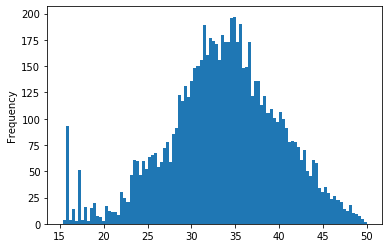

In [99]:
salida["Cal_alcance"].plot.hist(bins=100)

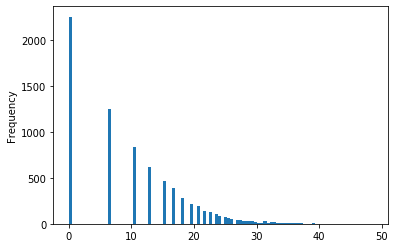

In [100]:
salida["Cal_publicaciones"].plot.hist(bins=100)

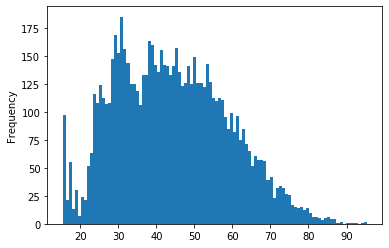

In [101]:
salida["Calificacion"].plot.hist(bins=100)

In [102]:
histdata = np.histogram(salida["Calificacion"],bins=100)
colw = (histdata[1][1]-histdata[1][0])*0.9

In [103]:
p = bpl.figure(plot_width=1000,plot_height=400,title="Histograma de calificaciones, CDMX",toolbar_location=None)
p.vbar(x=histdata[1][:-1],bottom=0,top=histdata[0],width=colw)

GlyphRenderer(id='1350', ...)

In [104]:
p.yaxis.axis_label = "Temas"
p.xaxis.axis_label = "Calificación"

In [105]:
bpl.show(p)